<a href="https://colab.research.google.com/github/k-vinamr/rera_construction_pred/blob/main/30_oct_5_floor_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [ ]:
data = pd.read_excel('5_floor_data.xlsx')

In [ ]:
data.head()

,organisation_name,project_category,actual_commencement_date,estimated_finish_date,total_built_up_area_saleable_area,total_area_of_project,floor,project_state,total_days,Cleaning & survey,...,"Electrical concealed, PVC Fitting, plastering at 1st floor",5th floor Columns casting,5th Floor slab casting,Brick work of 3rd to 5th Floor,"Electrical concealed, PVC Fitting, plastering at 2nd-5th floor",Plastering on outer sides,Tiles work,Painting and Finishing,"Plumbing & Sanitary,Electrification Works",Doors & Windows Fixing Furniture work
0,SHREE VRUNDAVAN DEVELOPERS,Residential/Group Housing,2017-08-31,2017-12-01,779.26,557.31,5,MAHARASHTRA,92,0.596628,...,2.386511,1.551232,2.625162,3.341115,8.352789,8.949416,7.159533,9.546044,5.369650,8.352789
1,SHASHIKALA RAMCHANDRA SALUNKHE,Residential/Group Housing,2021-09-09,2021-12-15,714.20,511.50,5,MAHARASHTRA,97,0.629053,...,2.516213,1.635538,2.767834,3.522698,8.806744,9.435798,7.548638,10.064851,5.661479,8.806744
2,NEELKANTH ASSOCIATES,Residential/Group Housing,2021-09-09,2021-12-15,1366.20,683.10,5,MAHARASHTRA,97,0.629053,...,2.516213,1.635538,2.767834,3.522698,8.806744,9.435798,7.548638,10.064851,5.661479,8.806744
3,BALASAHEB SHANKAR SUTAR,Residential/Group Housing,2020-05-23,2020-08-30,403.09,336.00,5,MAHARASHTRA,99,0.642023,...,2.568093,1.669261,2.824903,3.595331,8.988327,9.630350,7.704280,10.272374,5.778210,8.988327
4,Varad Builders and Promoters,Residential/Group Housing,2021-09-09,2021-12-20,690.00,575.00,5,MAHARASHTRA,102,0.661479,...,2.645914,1.719844,2.910506,3.704280,9.260700,9.922179,7.937743,10.583658,5.953307,9.260700


In [ ]:
data.describe()

,total_built_up_area_saleable_area,total_area_of_project,floor,total_days,Cleaning & survey,"Excavation,leveling & P.C.C for Basement B1","Raft footing, Column B1, Retaining wall Reinforcement ,Concrete pouring",Slab of B (bottom),Ground Floor slab casting,1st floor Columns casting,...,"Electrical concealed, PVC Fitting, plastering at 1st floor",5th floor Columns casting,5th Floor slab casting,Brick work of 3rd to 5th Floor,"Electrical concealed, PVC Fitting, plastering at 2nd-5th floor",Plastering on outer sides,Tiles work,Painting and Finishing,"Plumbing & Sanitary,Electrification Works",Doors & Windows Fixing Furniture work
count,3158.000000,3158.000000,3158.0,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,...,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000
mean,1945.636422,1603.079921,5.0,720.955351,4.675456,18.701825,25.247464,14.026369,26.182555,10.286004,...,18.701825,12.156186,20.572007,26.182555,65.456387,70.131844,56.105475,74.807300,42.079106,65.456387
std,3503.824398,3009.131037,0.0,475.671477,3.084770,12.339079,16.657756,9.254309,17.274710,6.786493,...,12.339079,8.020401,13.572986,17.274710,43.186775,46.271544,37.017236,49.356314,27.762927,43.186775
min,136.230000,130.000000,5.0,92.000000,0.596628,2.386511,3.221790,1.789883,3.341115,1.312581,...,2.386511,1.551232,2.625162,3.341115,8.352789,8.949416,7.159533,9.546044,5.369650,8.352789
25%,599.372500,426.880000,5.0,356.000000,2.308690,9.234760,12.466926,6.926070,12.928664,5.079118,...,9.234760,6.002594,10.158236,12.928664,32.321660,34.630350,27.704280,36.939040,20.778210,32.321660
50%,955.550000,641.285000,5.0,616.000000,3.994812,15.979248,21.571984,11.984436,22.370947,8.788586,...,15.979248,10.386511,17.577173,22.370947,55.927367,59.922179,47.937743,63.916991,35.953307,55.927367
75%,1799.842500,1469.200000,5.0,985.000000,6.387808,25.551232,34.494163,19.163424,35.771725,14.053178,...,25.551232,16.608301,28.106355,35.771725,89.429313,95.817121,76.653696,102.204929,57.490272,89.429313
max,45775.970000,38116.510000,5.0,3612.000000,23.424125,93.696498,126.490272,70.272374,131.175097,51.533074,...,93.696498,60.902724,103.066148,131.175097,327.937743,351.361868,281.089494,374.785992,210.817121,327.937743


In [ ]:
# Converting date columns to datetime objects
data['actual_commencement_date'] = pd.to_datetime(data['actual_commencement_date'], format='%d-%m-%Y', errors='coerce')
data['estimated_finish_date'] = pd.to_datetime(data['estimated_finish_date'], format='%d-%m-%Y', errors='coerce')


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 36 columns):
 #   Column                                                                     Non-Null Count  Dtype         
---  ------                                                                     --------------  -----         
 0   organisation_name                                                          3158 non-null   object        
 1   project_category                                                           3158 non-null   object        
 2   actual_commencement_date                                                   3158 non-null   datetime64[ns]
 3   estimated_finish_date                                                      3158 non-null   datetime64[ns]
 4   total_built_up_area_saleable_area                                          3158 non-null   float64       
 5   total_area_of_project                                                      3158 non-null   float64       
 6   

In [ ]:
current_date = datetime.now()


In [ ]:
data['duration_since_commencement'] = (current_date - data['actual_commencement_date']).dt.days
data['remaining_duration'] = (data['estimated_finish_date'] - current_date).dt.days
data['progress_ratio'] = data['duration_since_commencement'] / data['total_days']

In [ ]:
# Define a function to determine the project status
def determine_status(row):
    if current_date > row['estimated_finish_date']:
        return 'completed'
    elif current_date >= row['actual_commencement_date']:
        return 'running'
    else:
        return 'upcoming'

# Apply the function to create the 'Status' column
data['current_stage'] = data.apply(determine_status, axis=1)

# Print the DataFrame with the 'Status' column
data


,organisation_name,project_category,actual_commencement_date,estimated_finish_date,total_built_up_area_saleable_area,total_area_of_project,floor,project_state,total_days,Cleaning & survey,...,"Electrical concealed, PVC Fitting, plastering at 2nd-5th floor",Plastering on outer sides,Tiles work,Painting and Finishing,"Plumbing & Sanitary,Electrification Works",Doors & Windows Fixing Furniture work,duration_since_commencement,remaining_duration,progress_ratio,current_stage
0,SHREE VRUNDAVAN DEVELOPERS,Residential/Group Housing,2017-08-31,2017-12-01,779.26,557.31,5,MAHARASHTRA,92,0.596628,...,8.352789,8.949416,7.159533,9.546044,5.369650,8.352789,2251,-2160,24.467391,completed
1,SHASHIKALA RAMCHANDRA SALUNKHE,Residential/Group Housing,2021-09-09,2021-12-15,714.20,511.50,5,MAHARASHTRA,97,0.629053,...,8.806744,9.435798,7.548638,10.064851,5.661479,8.806744,781,-685,8.051546,completed
2,NEELKANTH ASSOCIATES,Residential/Group Housing,2021-09-09,2021-12-15,1366.20,683.10,5,MAHARASHTRA,97,0.629053,...,8.806744,9.435798,7.548638,10.064851,5.661479,8.806744,781,-685,8.051546,completed
3,BALASAHEB SHANKAR SUTAR,Residential/Group Housing,2020-05-23,2020-08-30,403.09,336.00,5,MAHARASHTRA,99,0.642023,...,8.988327,9.630350,7.704280,10.272374,5.778210,8.988327,1255,-1157,12.676768,completed
4,Varad Builders and Promoters,Residential/Group Housing,2021-09-09,2021-12-20,690.00,575.00,5,MAHARASHTRA,102,0.661479,...,9.260700,9.922179,7.937743,10.583658,5.953307,9.260700,781,-680,7.656863,completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3153,M/s SHREENIWAS HOMEMAKERS,Residential/Group Housing,2017-04-08,2025-03-31,3090.30,780.38,5,MAHARASHTRA,2914,18.897536,...,264.565499,283.463035,226.770428,302.360571,170.077821,264.565499,2396,517,0.822237,running
3154,CHAITANYA CONSTRUCTION,Residential/Group Housing,2022-02-22,2030-12-31,1931.05,1000.00,5,MAHARASHTRA,3234,20.972763,...,293.618677,314.591440,251.673152,335.564202,188.754864,293.618677,615,2618,0.190167,running
3155,SUSHANT SUMANT PATIL,Residential/Group Housing,2021-10-05,2030-12-31,1314.58,749.81,5,MAHARASHTRA,3374,21.880674,...,306.329442,328.210117,262.568093,350.090791,196.926070,306.329442,755,2618,0.223770,running
3156,SADGURU ASSOCIATES,Residential/Group Housing,2019-09-12,2028-12-30,4179.00,1620.66,5,MAHARASHTRA,3397,22.029831,...,308.417639,330.447471,264.357977,352.477302,198.268482,308.417639,1509,1887,0.444215,running


In [ ]:
# Assuming you have your data in a DataFrame named df
# If it's not, you can read your data from a CSV or any other source

# Define the bin edges
bin_width = 500
max_value = int(data['total_built_up_area_saleable_area'].max())
bin_edges = list(range(0, max_value + bin_width, bin_width))  # Creates bins of size 500

# Create a new column to store the bin labels
data['area_bin'] = pd.cut(data['total_built_up_area_saleable_area'], bin_edges)

# Group the data by the 'area_bin' column
grouped = data.groupby('area_bin')

# Define the features you want to analyze
features = ['total_days']  # Add more features as needed

# Iterate over the groups and calculate min and max for each feature
for feature in features:
    data_min = grouped[feature].min()
    data_max = grouped[feature].max()
    data_mean = grouped[feature].mean()
    data_count = grouped[feature].count()
    result = pd.concat([data_min, data_max, data_mean, data_count], axis=1)
    result.columns = ['Min', 'Max', 'Mean', 'Count']
    print(f"Statistics for '{feature}':")
    print(result)
    print("\n")

Statistics for 'total_days':
                   Min     Max         Mean  Count
area_bin                                          
(0, 500]          99.0  2334.0   533.750000    504
(500, 1000]       92.0  2700.0   637.863556   1136
(1000, 1500]      97.0  3374.0   775.131579    532
(1500, 2000]     103.0  3234.0   777.878893    289
(2000, 2500]     112.0  2506.0   838.668508    181
...                ...     ...          ...    ...
(43500, 44000]  1432.0  1432.0  1432.000000      1
(44000, 44500]     NaN     NaN          NaN      0
(44500, 45000]   478.0   478.0   478.000000      1
(45000, 45500]     NaN     NaN          NaN      0
(45500, 46000]  1614.0  1614.0  1614.000000      1

[92 rows x 4 columns]




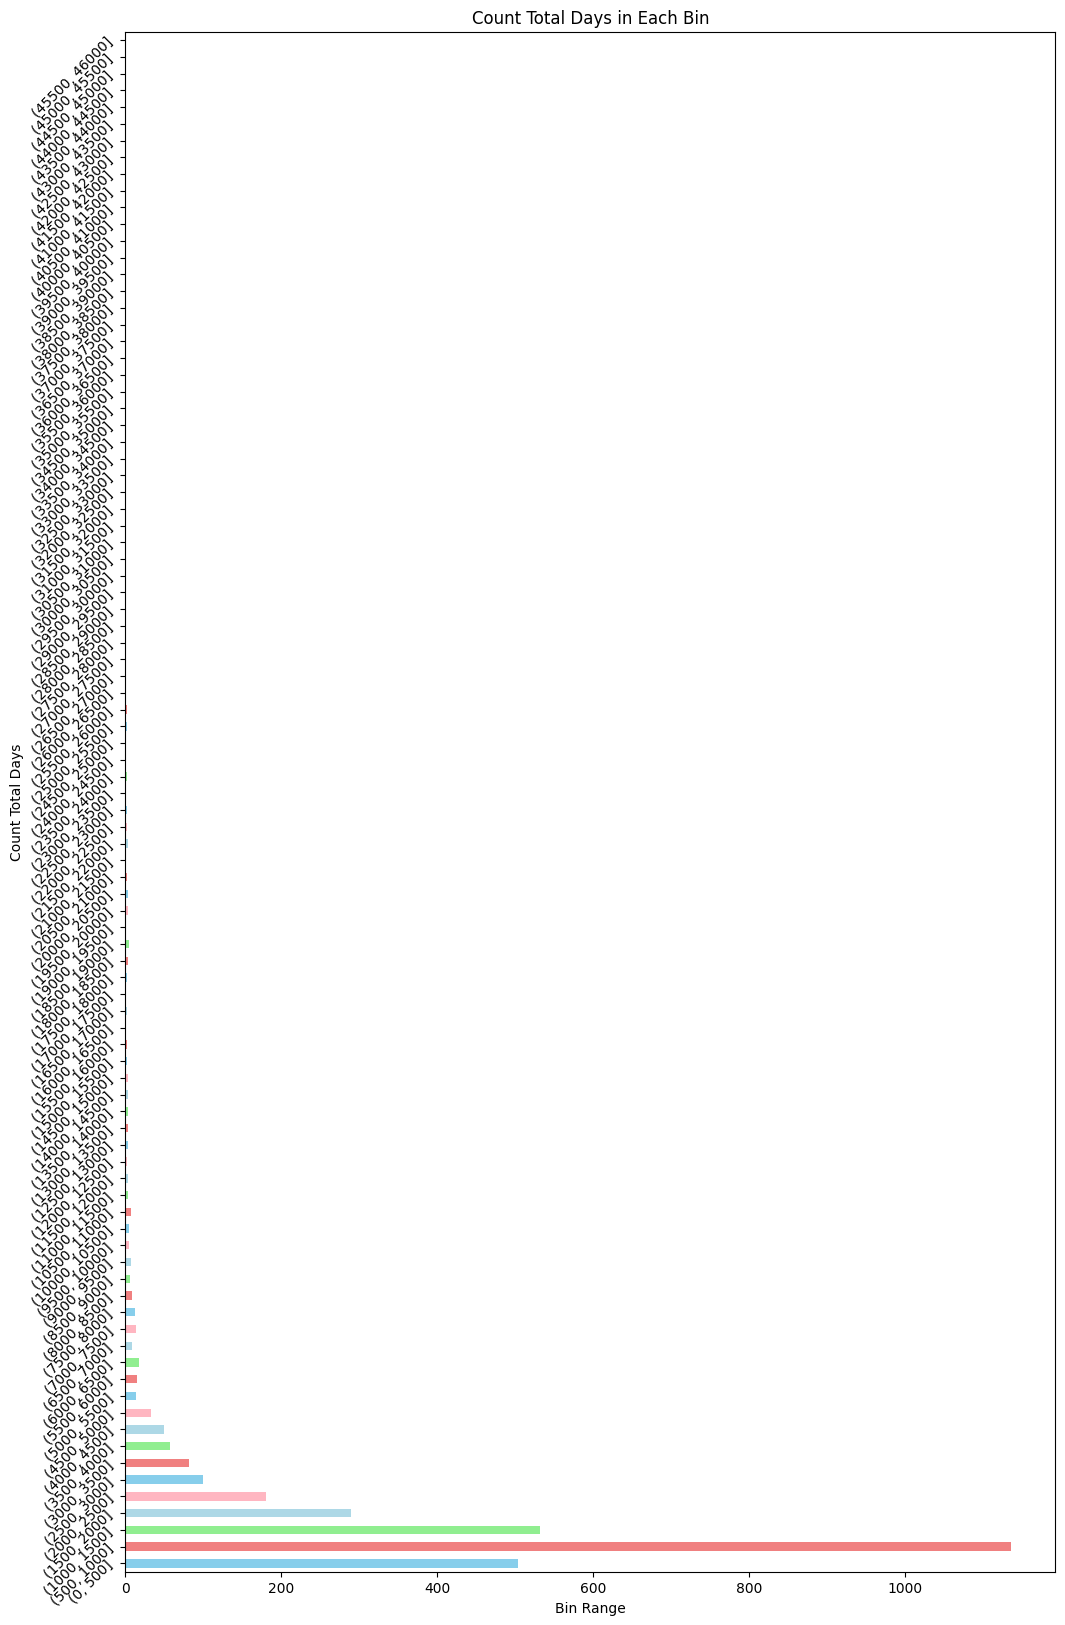

In [ ]:
# Create a bar chart for the mean values
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightblue', 'lightpink']
plt.figure(figsize=(12, 20))
data_count.plot(kind='barh', color=colors)
plt.xlabel('Bin Range')
plt.ylabel('Count Total Days')
plt.title('Count Total Days in Each Bin')
plt.yticks(range(len(data_count)), data_count.index, rotation=45)
plt.show()

In [ ]:
# Filter the DataFrame based on the condition
filtered_data = data[data['total_built_up_area_saleable_area'] < 45000]

In [ ]:
# Assuming you have your data in a DataFrame named df
# If it's not, you can read your data from a CSV or any other source

# Define the bin edges
bin_width = 500
max_value = int(filtered_data['total_built_up_area_saleable_area'].max())
bin_edges = list(range(0, max_value + bin_width, bin_width))  # Creates bins of size 500

# Create a new column to store the bin labels
filtered_data['area_bin'] = pd.cut(filtered_data['total_built_up_area_saleable_area'], bin_edges)

# Group the data by the 'area_bin' column
grouped = filtered_data.groupby('area_bin')

# Define the features you want to analyze
features = ['total_days']  # Add more features as needed

# Iterate over the groups and calculate min and max for each feature
for feature in features:
    filtered_data_min = grouped[feature].min()
    filtered_data_max = grouped[feature].max()
    filtered_data_mean = grouped[feature].mean()
    filtered_data_count = grouped[feature].count()
    result = pd.concat([filtered_data_min, filtered_data_max, filtered_data_mean, filtered_data_count], axis=1)
    result.columns = ['Min', 'Max', 'Mean', 'Count']
    print(f"Statistics for '{feature}':")
    print(result)
    print("\n")

Statistics for 'total_days':
                   Min     Max         Mean  Count
area_bin                                          
(0, 500]          99.0  2334.0   533.750000    504
(500, 1000]       92.0  2700.0   637.863556   1136
(1000, 1500]      97.0  3374.0   775.131579    532
(1500, 2000]     103.0  3234.0   777.878893    289
(2000, 2500]     112.0  2506.0   838.668508    181
...                ...     ...          ...    ...
(42500, 43000]     NaN     NaN          NaN      0
(43000, 43500]     NaN     NaN          NaN      0
(43500, 44000]  1432.0  1432.0  1432.000000      1
(44000, 44500]     NaN     NaN          NaN      0
(44500, 45000]   478.0   478.0   478.000000      1

[90 rows x 4 columns]




<ipython-input-44-3ac3ef85beec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['area_bin'] = pd.cut(filtered_data['total_built_up_area_saleable_area'], bin_edges)


In [ ]:
import pandas as pd
import random
from datetime import timedelta

# Assuming you have your filtered data in a DataFrame named filtered_df
# Ensure you have loaded the necessary libraries and data

# Define the number of data points you want to generate
desired_data_points = 20000  # Change this number as needed

# Create an empty DataFrame to store the augmented data
augmented_data = pd.DataFrame(columns=filtered_data.columns)

# Copy the original data to the augmented DataFrame
augmented_data = augmented_data.append(filtered_data, ignore_index=True)

# Define the range for small changes (you can adjust this)
date_change_range = 7  # Number of days for date changes
area_change_range = 10  # Range for changing area

# Generate additional data points
while len(augmented_data) < desired_data_points:
    # Randomly select an existing row to modify
    index_to_modify = random.randint(0, len(filtered_data) - 1)
    row_to_modify = augmented_data.iloc[index_to_modify].copy()

    # Make small changes to the selected row
    row_to_modify['actual_commencement_date'] += timedelta(days=random.randint(-date_change_range, date_change_range))
    row_to_modify['estimated_finish_date'] += timedelta(days=random.randint(-date_change_range, date_change_range))
    row_to_modify['total_built_up_area_saleable_area'] += random.uniform(-area_change_range, area_change_range)
    row_to_modify['total_area_of_project'] += random.uniform(-area_change_range, area_change_range)

    # Add the modified row to the augmented DataFrame
    augmented_data = augmented_data.append(row_to_modify, ignore_index=True)

    # You may want to truncate the DataFrame to the desired number of data points
    augmented_data = augmented_data[:desired_data_points]

    # Now, augmented_data contains the augmented data with the specified changes


Streaming output truncated to the last 5000 lines.
<ipython-input-45-433956e125ad>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(row_to_modify, ignore_index=True)
<ipython-input-45-433956e125ad>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(row_to_modify, ignore_index=True)
<ipython-input-45-433956e125ad>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(row_to_modify, ignore_index=True)
<ipython-input-45-433956e125ad>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(row_to_

In [ ]:
augmented_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column                                                                     Non-Null Count  Dtype                 
---  ------                                                                     --------------  -----                 
 0   organisation_name                                                          20000 non-null  object                
 1   project_category                                                           20000 non-null  object                
 2   actual_commencement_date                                                   20000 non-null  datetime64[ns]        
 3   estimated_finish_date                                                      20000 non-null  datetime64[ns]        
 4   total_built_up_area_saleable_area                                          20000 non-null  float64               
 5   total_area_of_project                                

In [ ]:
# Define the bin edges
bin_width = 500
max_value = int(augmented_data['total_built_up_area_saleable_area'].max())
bin_edges = list(range(0, max_value + bin_width, bin_width))  # Creates bins of size 500

# Create a new column to store the bin labels
augmented_data['area_bin'] = pd.cut(augmented_data['total_built_up_area_saleable_area'], bin_edges)

# Group the data by the 'area_bin' column
grouped = augmented_data.groupby('area_bin')

# Define the features you want to analyze
features = ['total_days']  # Add more features as needed

# Iterate over the groups and calculate min and max for each feature
for feature in features:
    augmented_data_min = grouped[feature].min()
    augmented_data_max = grouped[feature].max()
    augmented_data_mean = grouped[feature].mean()
    augmented_data_count = grouped[feature].count()
    result = pd.concat([augmented_data_min, augmented_data_max, augmented_data_mean, augmented_data_count], axis=1)
    result.columns = ['Min', 'Max', 'Mean', 'Count']
    print(f"Statistics for '{feature}':")
    print(result)
    print("\n")


Statistics for 'total_days':
                   Min     Max         Mean  Count
area_bin                                          
(0, 500]          99.0  2334.0   541.712690   3223
(500, 1000]       92.0  2700.0   637.358104   7132
(1000, 1500]      97.0  3374.0   774.151834   3326
(1500, 2000]     103.0  3234.0   783.159892   1845
(2000, 2500]     112.0  2506.0   827.694590   1146
...                ...     ...          ...    ...
(42500, 43000]     NaN     NaN          NaN      0
(43000, 43500]     NaN     NaN          NaN      0
(43500, 44000]  1432.0  1432.0  1432.000000      5
(44000, 44500]     NaN     NaN          NaN      0
(44500, 45000]   478.0   478.0   478.000000      4

[90 rows x 4 columns]




In [ ]:
augmented_data.to_csv('augmented_5_floor.csv', index=False)